In [ ]:
#Import Package
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error , mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Cek Missing Values
print('Missing Values pada Data :')
print(df.isnull().sum())

Missing Values pada Data :
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
#Handling Missing Value
print('=======================================\n')
print('Handling Missing Values variabel total_bedrooms pada Data :')
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df.isna().sum()


Handling Missing Values variabel total_bedrooms pada Data :


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


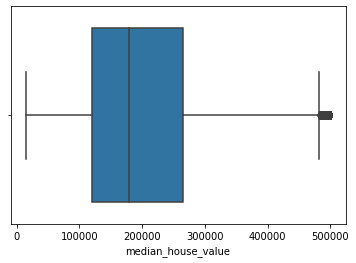

In [ ]:
#Cek Outlier
sns.boxplot(df['median_house_value'])
plt.show()

In [ ]:
#Define Q1 and Q3

Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Upper_Whisker)
print(Lower_Whisker)

482412.5
-98087.5


In [ ]:
df= df[(df['median_house_value']>Lower_Whisker) & (df['median_house_value']<Upper_Whisker)]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


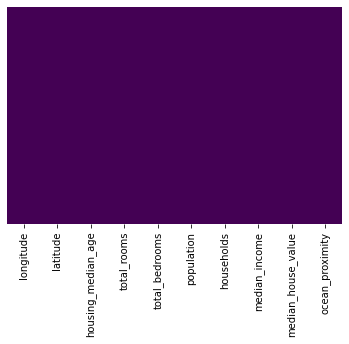

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


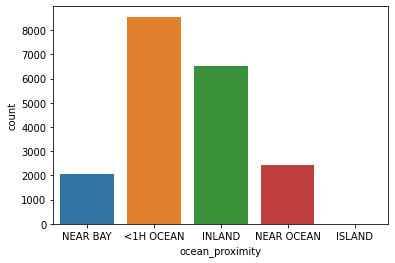

In [ ]:
sns.countplot(df['ocean_proximity'])
plt.show()

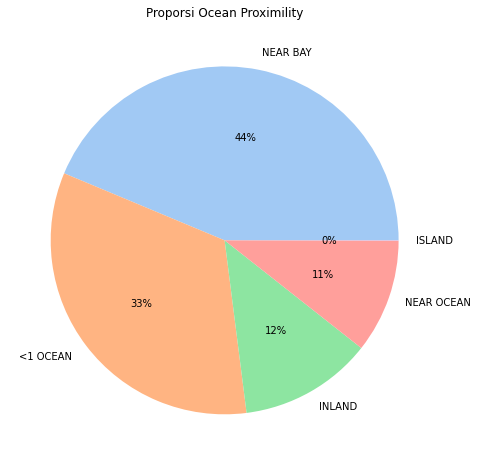

In [ ]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:5]
labels = ['NEAR BAY', '<1 OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
#create pie chart
plt.pie(df['ocean_proximity'].value_counts(), labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporsi Ocean Proximility")
plt.show()

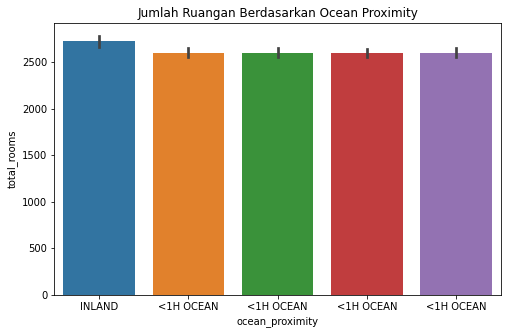

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="ocean_proximity",y="total_rooms", data=df, order=df.sort_values('total_rooms',ascending = False).ocean_proximity.head(5))
plt.title("Jumlah Ruangan Berdasarkan Ocean Proximity")
plt.ylabel("total_rooms")
plt.xlabel("ocean_proximity")
plt.show()

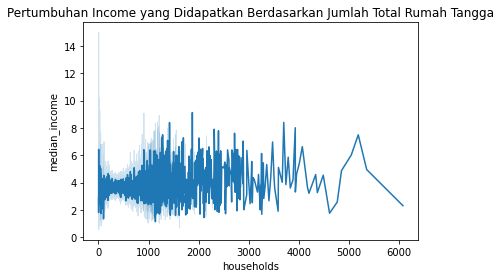

In [ ]:
sns.lineplot(x="households", y ="median_income",data=df)
plt.title("Pertumbuhan Income yang Didapatkan Berdasarkan Jumlah Total Rumah Tangga")
plt.show()

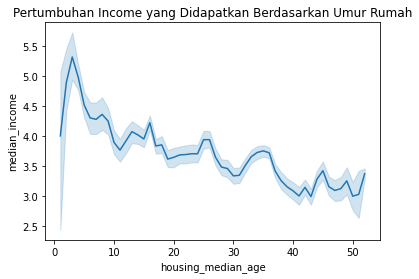

In [ ]:
sns.lineplot(x="housing_median_age", y ="median_income",data=df)
plt.title("Pertumbuhan Income yang Didapatkan Berdasarkan Umur Rumah")
plt.show()

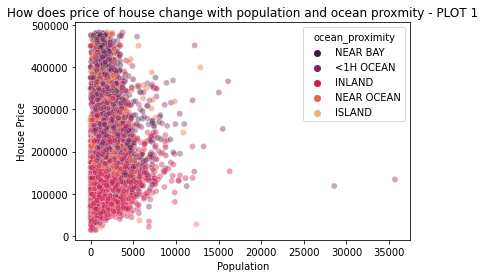

In [ ]:
sns.scatterplot(data=df, x="population", y="median_house_value", hue="ocean_proximity", palette="rocket", alpha=0.4).set(
    title = "How does price of house change with population and ocean proxmity - PLOT 1",
    xlabel = "Population",
    ylabel = "House Price"
)
plt.show()

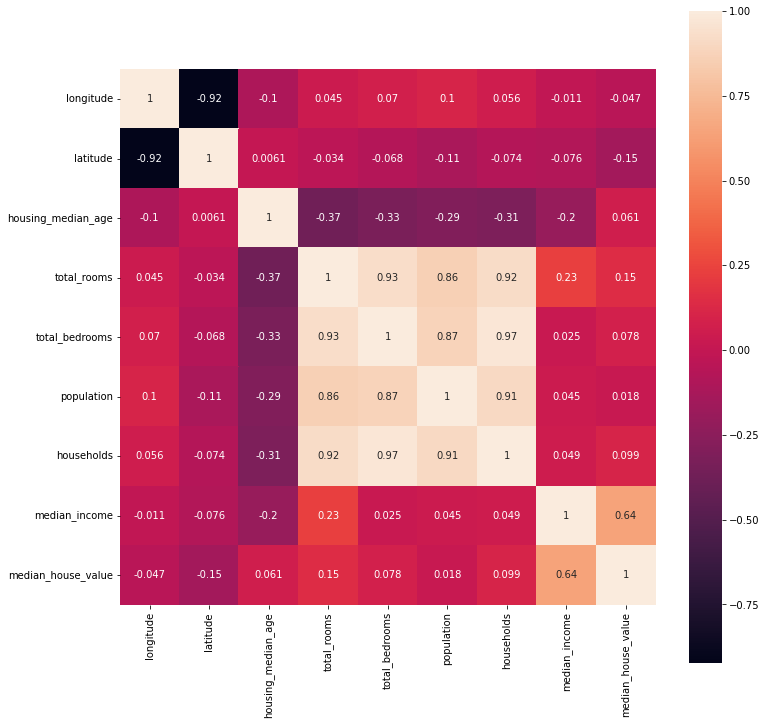

In [ ]:
# Heatmap
fig = plt.figure(figsize=(12,12))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True,)
plt.yticks(rotation=0)

plt.show()

In [ ]:
plt.figure(figsize=(24, 18))
for i in range (0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df[nums[i]],color='lightseagreen')
    plt.tight_layout()

In [ ]:
df.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.10,0.04,0.07,0.10,0.06,-0.01,-0.05
latitude,-0.92,1.00,0.01,-0.03,-0.07,-0.11,-0.07,-0.08,-0.15
housing_median_age,-0.10,0.01,1.00,-0.37,-0.33,-0.29,-0.31,-0.20,0.06
total_rooms,0.04,-0.03,-0.37,1.00,0.93,0.86,0.92,0.23,0.15
total_bedrooms,0.07,-0.07,-0.33,0.93,1.00,0.87,0.97,0.02,0.08
population,0.10,-0.11,-0.29,0.86,0.87,1.00,0.91,0.05,0.02
households,0.06,-0.07,-0.31,0.92,0.97,0.91,1.00,0.05,0.10
median_income,-0.01,-0.08,-0.20,0.23,0.02,0.05,0.05,1.00,0.64
median_house_value,-0.05,-0.15,0.06,0.15,0.08,0.02,0.10,0.64,1.00


# **Feature Engineering**

One Hot Encoding

In [ ]:
le_ocean_pro = LabelEncoder()
df["ocean_proximity"] =le_ocean_pro.fit_transform(df["ocean_proximity"])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [ ]:
df['ocean_proximity'].value_counts()

0    8552
1    6519
4    2419
3    2074
2       5
Name: ocean_proximity, dtype: int64

## **Split Data**

In [ ]:
#Pembagian Data

#Target
y=df['median_house_value']

#Feature
X=df.drop(['median_house_value'],axis=1)

In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19569, dtype: float64

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [ ]:
#Function Random Forest
def forest(df):
  #Split Data
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=43)

  #Model Random Forest

  #create the model
  rf=RandomForestRegressor()

  #fit the model
  rf_fit = rf.fit(train_X,train_y)

  #prediction value
  rf_predict = rf.predict(test_X)

  #score random forest
  rf_score = rf.score(train_X, train_y), rf.score(test_X, test_y)
  return rf_predict, rf_score, test_y 

In [ ]:
rf_predict, rf_score, test_y = forest(df)

In [ ]:
print("Random Forest Score: {}".format(rf_score))

Random Forest Score: (0.970065387397626, 0.7918317665139601)


In [ ]:
#Function Linear Regression
def linear(df):
  #Split Data
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=43)

  #Model Random Forest

  #create the model
  lr = LinearRegression()

  #fit the model
  lr_fit = lr.fit(train_X,train_y)

  #prediction value
  lr_predict = lr.predict(test_X)

  #score random forest
  lr_score = lr.score(train_X, train_y), lr.score(test_X, test_y)
  return lr_predict, lr_score, test_y 

In [ ]:
lr_predict, lr_score, test_y = linear(df)

In [ ]:
print("Linear Regression Score: {}".format(lr_score))

Linear Regression Score: (0.6011240629891184, 0.6002390063667927)


In [ ]:
#Function Ridge Regression
def ridge(df):
  #Split Data
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=43)

  #Model Random Forest

  #create the model
  r = Ridge()

  #fit the model
  r_fit = r.fit(train_X,train_y)

  #prediction value
  r_predict = r.predict(test_X)

  #score random forest
  r_score = r.score(train_X, train_y), r.score(test_X, test_y)
  return r_predict, r_score, test_y 

In [ ]:
r_predict, r_score, test_y = ridge(df)

In [ ]:
print("Ridge Regression Score: {}".format(r_score))

Ridge Regression Score: (0.6011240571748427, 0.6002400514228254)


In [ ]:
compare_rf = pd.DataFrame({"Actual Data": test_y, "Predicted Data": rf_predict})
compare_linear = pd.DataFrame({"Actual Data": test_y, "Predicted Data": lr_predict})
print("-------------------------------------")
print("---------Random Forest Regression----------")
print(compare_rf.head(10))
print("-------------------------------------")
print("---------------Linear Regression------------------")
print(compare_linear.head(10))

-------------------------------------
---------Random Forest Regression----------
       Actual Data  Predicted Data
19660      93100.0        131116.0
16441     101800.0        122789.0
17527     212500.0        211502.0
652       188900.0        182346.0
11856      82500.0         94955.0
5778      178600.0        228500.0
9881      162200.0        173504.0
7916      200800.0        194991.0
18477     321700.0        264115.0
10492     294300.0        288961.0
-------------------------------------
---------------Linear Regression------------------
       Actual Data  Predicted Data
19660      93100.0    74266.932569
16441     101800.0   153825.272470
17527     212500.0   152639.602732
652       188900.0   207340.483740
11856      82500.0    14287.757944
5778      178600.0   191319.645475
9881      162200.0   216696.289593
7916      200800.0   204228.444791
18477     321700.0   275735.400346
10492     294300.0   293077.600596


In [ ]:
def actual_pred_plot(df, title):
    plt.figure(figsize =(14,6))
    df = df.reset_index()
    df = df.drop(["index"], axis=1)
    plt.plot(df[:50])
    plt.legend(["Actual", "Predicted"])
    plt.title(title)
    plt.show()

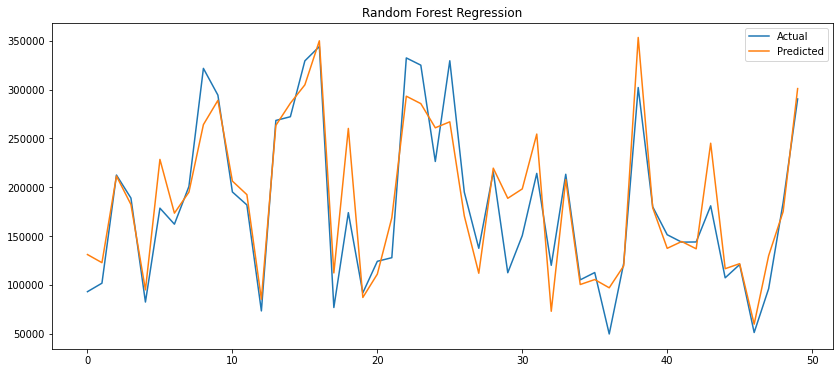

In [ ]:
actual_pred_plot(compare_rf, "Random Forest Regression")

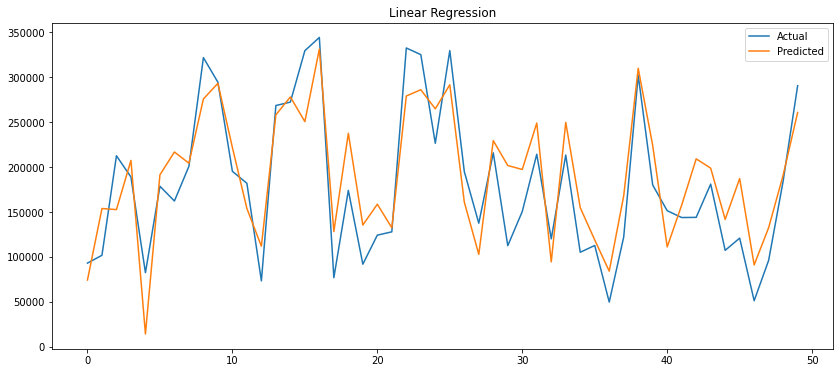

In [ ]:
actual_pred_plot(compare_linear, "Linear Regression")

In [ ]:
def models_evaluation(df, model_name):
    print("-------------------------------")
    print(model_name)
    print("R-Squared:", r2_score(df["Actual Data"], df["Predicted Data"]))
    print("MAE:", mean_absolute_error(df["Actual Data"], df["Predicted Data"]))
    print("MSE:", mean_squared_error(df["Actual Data"], df["Predicted Data"]))
    print("MAE%:", mean_absolute_percentage_error(df["Actual Data"], df["Predicted Data"]))
    print("-------------------------------")

In [ ]:
models_evaluation(compare_rf, "Random Forest Regression")

-------------------------------
Random Forest Regression
R-Squared: 0.7918317665139601
MAE: 28935.735115471085
MSE: 1875222355.8216732
MAE%: 0.17383505323345197
-------------------------------


In [ ]:
models_evaluation(compare_linear, "Linear Regression")

-------------------------------
Linear Regression
R-Squared: 0.6002390063667927
MAE: 44618.30944440582
MSE: 3601129431.195121
MAE%: 0.2882988573087535
-------------------------------
